In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import rc, rcParams
rc('text', usetex=True)
rc('axes', linewidth=1.5)
rc('axes', labelweight='bold')
rc('axes',labelsize=20)
rc('axes.formatter',min_exponent=0)
rc('font', weight='bold')
rc('font', size=16)
rc('xtick',direction='in')
rc('ytick',direction='in')
rc('xtick.major',width=1)
rc('ytick.major',width=1)
rc('xtick.major',size=6)
rc('ytick.major',size=6)
rc('xtick.minor',visible=True)
rc('ytick.minor',visible=True)
rc('xtick.minor',size=3)
rc('ytick.minor',size=3)
rc('xaxis',labellocation='right')
rc('yaxis',labellocation='top')
rc('lines',linewidth='2')
rcParams['text.latex.preamble'] = r'\usepackage{sfmath} \boldmath'


In [2]:
column_names=['x','z','Q','qT_Q','xs','xs_err']
df_F_unpol_born = pd.read_csv('inputs/RC/JLab_2_unpol_born_test_lowQ2.txt',delim_whitespace=True,names=column_names)
df_F_unpol_born.head()

,x,z,Q,qT_Q,xs,xs_err
0,0.48,0.375,2.0,0.05,0.000541,2.289900e-09
1,0.48,0.375,2.0,0.15,0.000511,9.337403e-09
2,0.48,0.375,2.0,0.25,0.000456,1.437675e-08
3,0.48,0.375,2.0,0.35,0.000384,1.529998e-08
4,0.48,0.375,2.0,0.45,0.000306,1.248040e-08


In [3]:
column_names=['x','z','Q','qT_Q','xs','xs_err']
df_F_unpol_rc = pd.read_csv('inputs/RC/JLab_2_unpol_rc_test_lowQ2.txt',delim_whitespace=True,names=column_names)
df_F_unpol_rc.head()

,x,z,Q,qT_Q,xs,xs_err
0,0.48,0.375,2.0,0.05,0.000432,5.151443e-09
1,0.48,0.375,2.0,0.15,0.000409,7.277464e-09
2,0.48,0.375,2.0,0.25,0.000365,1.249137e-08
3,0.48,0.375,2.0,0.35,0.000309,9.262938e-09
4,0.48,0.375,2.0,0.45,0.000247,1.057583e-08


In [4]:
column_names=['id','Eb','beam_pol','target_pol','x','y','z','pt2','phih','phi','k0','born','amm','nrad_ir','rad_f_v','rad_f_e','nrad_v','nrad_e','rad_v','rad_e','all_v','all_e']
df_T = pd.read_csv('inputs/RC/JLab2_tra_lowQ2.txt',delim_whitespace=True,names=column_names)
df_T.head()

,id,Eb,beam_pol,target_pol,x,y,z,pt2,phih,phi,...,amm,nrad_ir,rad_f_v,rad_f_e,nrad_v,nrad_e,rad_v,rad_e,all_v,all_e
0,0,11,U,U,0.32,0.5206,0.375,0.001,-2,1,...,3.127101e-14,0.000015,-1.726875e-08,1.873296e-12,0.000015,1.873296e-12,0.000006,2.520942e-09,0.000021,2.522815e-09
1,0,11,U,U,0.32,0.5206,0.375,0.002,-2,1,...,3.113831e-14,0.000015,-1.701889e-08,1.820835e-12,0.000015,1.820835e-12,0.000006,2.506724e-09,0.000021,2.508545e-09
2,0,11,U,U,0.32,0.5206,0.375,0.003,-2,1,...,3.100618e-14,0.000015,-1.680761e-08,1.850206e-12,0.000015,1.850206e-12,0.000006,2.522384e-09,0.000021,2.524234e-09
3,0,11,U,U,0.32,0.5206,0.375,0.004,-2,1,...,3.087461e-14,0.000015,-1.661673e-08,1.777283e-12,0.000015,1.777283e-12,0.000006,2.480209e-09,0.000021,2.481987e-09
4,0,11,U,U,0.32,0.5206,0.375,0.005,-2,1,...,3.074359e-14,0.000015,-1.643917e-08,1.759829e-12,0.000015,1.759829e-12,0.000006,2.537604e-09,0.000021,2.539364e-09


0.05
0.15
0.25
0.35
0.45
0.55
0.65
0.75
0.85
0.95
1.05
1.15
1.25
1.35
1.45


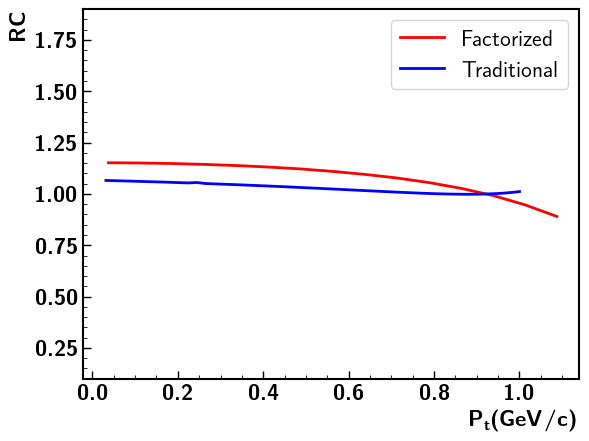

In [10]:
qT_Q = df_F_unpol_born[df_F_unpol_born['x']==0.32]['qT_Q'].to_list()
Pts = []
RCs_F = []
RCs_T = []
for i_qtq in range(0,len(qT_Q)):
    iqT_Q = qT_Q[i_qtq]
    print(iqT_Q)
    Q = df_F_unpol_born[(df_F_unpol_born['x']==0.32)&(df_F_unpol_born['qT_Q']==iqT_Q)]['Q']
    z = df_F_unpol_born[(df_F_unpol_born['x']==0.32)&(df_F_unpol_born['qT_Q']==iqT_Q)]['z']
    Pt = iqT_Q*Q*z
    Pts.append(Pt)
    xs_born = df_F_unpol_born[(df_F_unpol_born['x']==0.32)&(df_F_unpol_born['qT_Q']==iqT_Q)]['xs']
    xs_rc = df_F_unpol_rc[(df_F_unpol_rc['x']==0.32)&(df_F_unpol_rc['qT_Q']==iqT_Q)]['xs']
    RC = xs_born/xs_rc
    RCs_F.append(RC)
plt.plot(Pts,RCs_F,'r',label='Factorized')

pt2s = df_T['pt2'].to_list()
Pts_T = []
for i_pt2 in range(0,len(pt2s)):
    pt2 = pt2s[i_pt2]
    pt=math.sqrt(pt2)
    Pts_T.append(pt)
    xs_born = df_T[df_T['pt2']==pt2]['born']
    xs_rc = df_T[df_T['pt2']==pt2]['all_v']
    RC = xs_born/xs_rc
    RCs_T.append(RC)
plt.plot(Pts_T,RCs_T,'b',label='Traditional')
plt.ylim(0.1,1.9)
plt.legend()
plt.xlabel('$P_t (GeV/c)$',fontsize=16)
plt.ylabel('$RC$',fontsize=16)
plt.savefig('results/RC_compare_SoLID_lowQ2.pdf')